In [ ]:
#### Logistic Regression

In [2]:
1. Data Exploration:
a. Load the dataset and perform exploratory data analysis (EDA).
b. Examine the features, their types, and summary statistics.
c. Create visualizations such as histograms, box plots, or pair plots to visualize the distributions and relationships between features.
Analyze any patterns or correlations observed in the data.

2. Data Preprocessing:
a. Handle missing values (e.g., imputation).
b. Encode categorical variables.

3. Model Building:
a. Build a logistic regression model using appropriate libraries (e.g., scikit-learn).
b. Train the model using the training data.

4. Model Evaluation:
a. Evaluate the performance of the model on the testing data using accuracy, precision, recall, F1-score, and ROC-AUC score.
Visualize the ROC curve.

5. Interpretation:
a. Interpret the coefficients of the logistic regression model.
b. Discuss the significance of features in predicting the target variable (survival probability in this case).

6. Deployment with Streamlit:
In this task, you will deploy your logistic regression model using Streamlit. The deployment can be done locally or online via 
Streamlit Share. Your task includes creating a Streamlit app in Python that involves loading your trained model and setting up user inputs for predictions. 



SyntaxError: invalid syntax (2222947601.py, line 1)

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from sklearn.preprocessing import StandardScaler, LabelEncoder
import streamlit as st
import pickle

C:\Users\OM\AppData\Roaming\Python\Python311\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
# Load the datasets
train_df = pd.read_csv(r"D:\Logistic Regression\Titanic_train.csv")
test_df = pd.read_csv(r"D:\Logistic Regression\Titanic_test.csv")
print(train_df)
print(test_df)

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ... 

In [3]:
# Display the first few rows of the training dataset
print(train_df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [4]:
# Display the first few rows of the training dataset
print(test_df.head())


   PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
0  34.5      0      0   330911   7.8292   NaN        Q  
1  47.0      1      0   363272   7.0000   NaN        S  
2  62.0      0      0   240276   9.6875   NaN        Q  
3  27.0      0      0   315154   8.6625   NaN        S  
4  22.0      1      1  3101298  12.2875   NaN        S  


In [5]:
# Data Exploration
# Check for missing values
print(train_df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [6]:
# Data Exploration
# Check for missing values
print(test_df.isnull().sum())

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [7]:
# Summary statistics of the dataset
print(train_df.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


In [8]:
# Summary statistics of the dataset
print(test_df.describe())


       PassengerId      Pclass         Age       SibSp       Parch        Fare
count   418.000000  418.000000  332.000000  418.000000  418.000000  417.000000
mean   1100.500000    2.265550   30.272590    0.447368    0.392344   35.627188
std     120.810458    0.841838   14.181209    0.896760    0.981429   55.907576
min     892.000000    1.000000    0.170000    0.000000    0.000000    0.000000
25%     996.250000    1.000000   21.000000    0.000000    0.000000    7.895800
50%    1100.500000    3.000000   27.000000    0.000000    0.000000   14.454200
75%    1204.750000    3.000000   39.000000    1.000000    0.000000   31.500000
max    1309.000000    3.000000   76.000000    8.000000    9.000000  512.329200


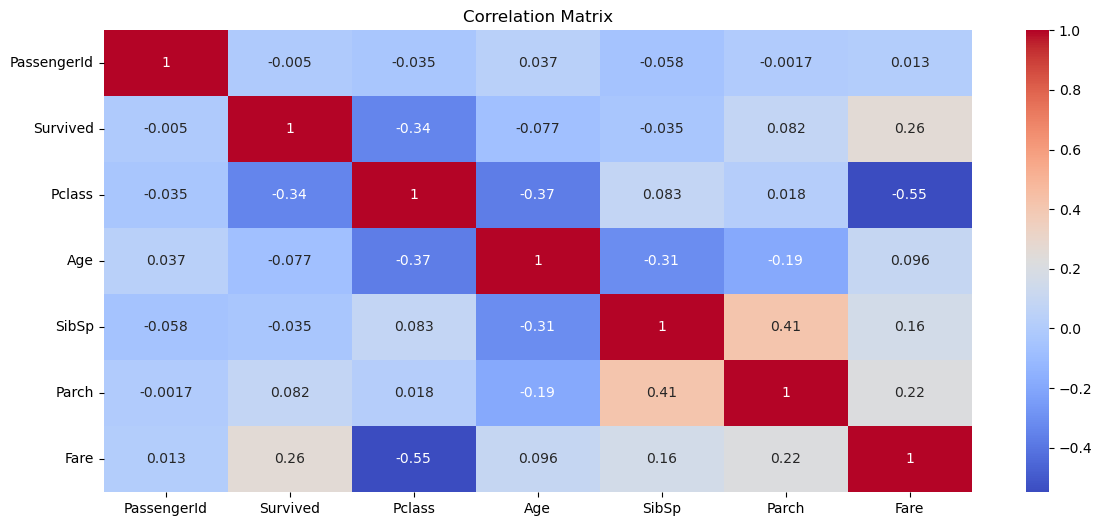

In [9]:
train_df = train_df.select_dtypes(include=['number'])
plt.figure(figsize=(14, 6))
sns.heatmap(train_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

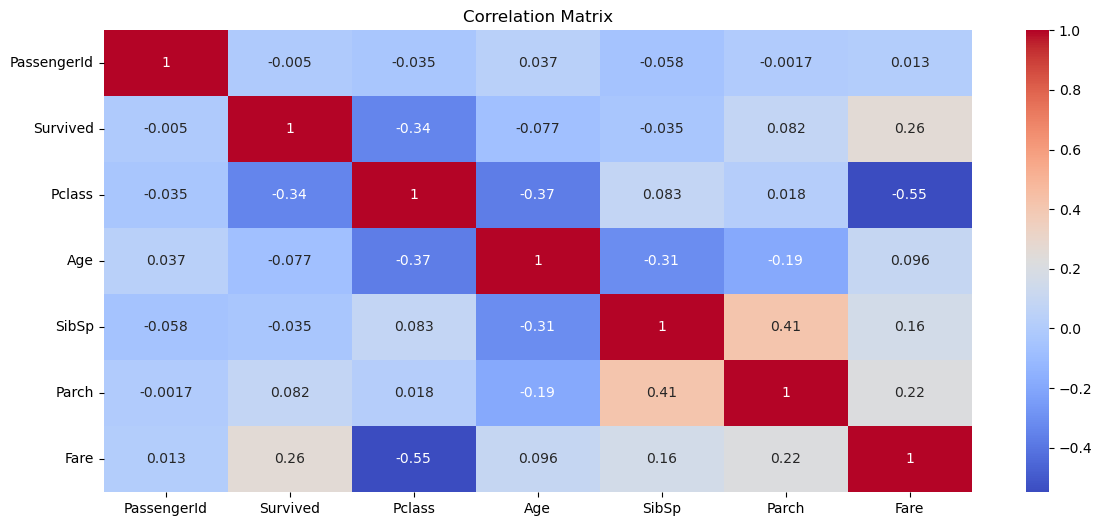

In [10]:
test_df = test_df.select_dtypes(include=['number'])
plt.figure(figsize=(14, 6))
sns.heatmap(train_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

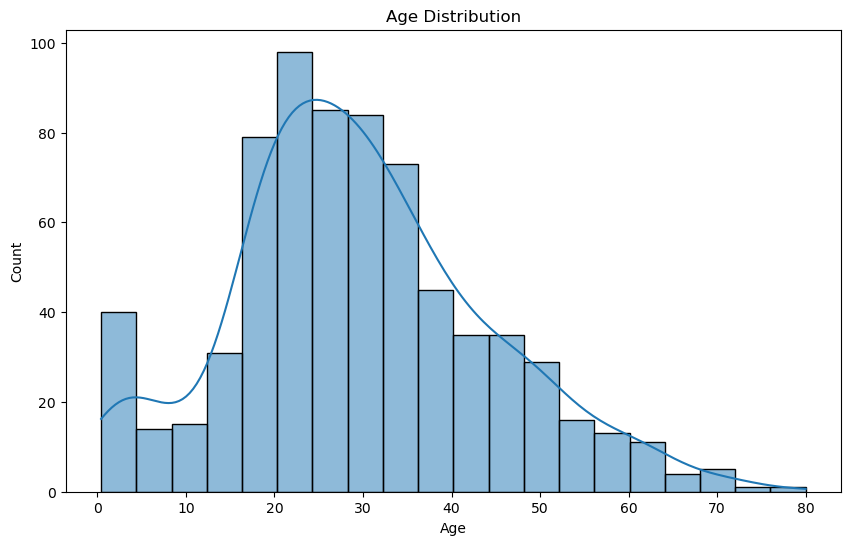

In [11]:
plt.figure(figsize=(10, 6))
sns.histplot(train_df['Age'].dropna(), kde=True)
plt.title('Age Distribution')
plt.show()

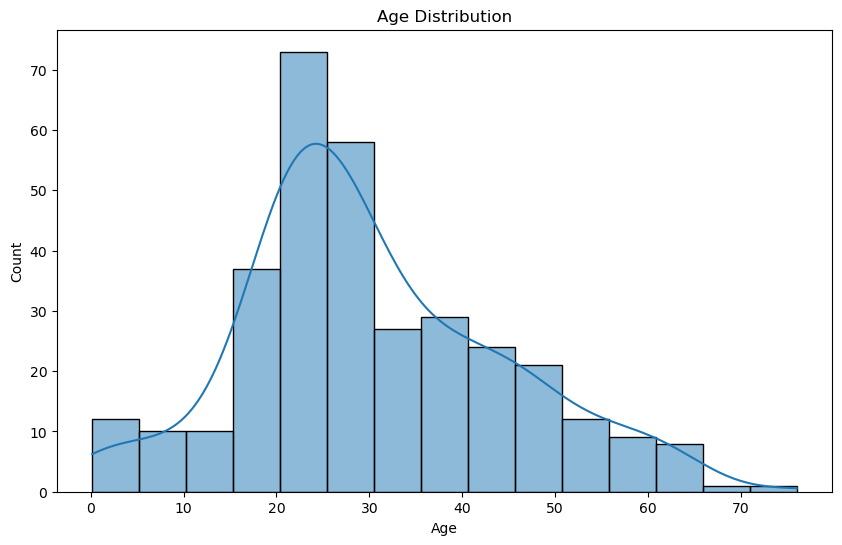

In [12]:
plt.figure(figsize=(10, 6))
sns.histplot(test_df['Age'].dropna(), kde=True)
plt.title('Age Distribution')
plt.show()

In [13]:
import pandas as pd

# Load the dataset
train_df = pd.read_csv(r"D:\Logistic Regression\Titanic_train.csv")

# Verify columns
print(train_df.columns)


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [14]:
print(train_df.columns)


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [18]:
# Data Preprocessing
# Handle missing values
train_df['Age'].fillna(train_df['Age'].median(), inplace=True)
train_df['Embarked'].fillna(train_df['Embarked'].mode()[0], inplace=True)
train_df['Cabin'].fillna('Unknown', inplace=True)


C:\Users\OM\AppData\Local\Temp\ipykernel_8364\3497313455.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['Age'].fillna(train_df['Age'].median(), inplace=True)
C:\Users\OM\AppData\Local\Temp\ipykernel_8364\3497313455.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

F

In [19]:
import pandas as pd

# Load the dataset
test_df = pd.read_csv(r"D:\Logistic Regression\Titanic_test.csv")
# Verify columns
print(test_df.columns)


Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [20]:
print(test_df.columns)


Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [21]:
# Data Preprocessing
# Handle missing values
test_df['Age'].fillna(test_df['Age'].median(), inplace=True)
test_df['Embarked'].fillna(test_df['Embarked'].mode()[0], inplace=True)
test_df['Cabin'].fillna('Unknown', inplace=True)


C:\Users\OM\AppData\Local\Temp\ipykernel_10616\2001174547.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_df['Age'].fillna(test_df['Age'].median(), inplace=True)
C:\Users\OM\AppData\Local\Temp\ipykernel_10616\2001174547.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

F

In [22]:
# Encode categorical variables
le = LabelEncoder()
train_df['Sex'] = le.fit_transform(train_df['Sex'])
train_df['Embarked'] = le.fit_transform(train_df['Embarked'])
train_df['Cabin'] = le.fit_transform(train_df['Cabin'])


In [23]:
# Encode categorical variables
le = LabelEncoder()
test_df['Sex'] = le.fit_transform(test_df['Sex'])
test_df['Embarked'] = le.fit_transform(test_df['Embarked'])
test_df['Cabin'] = le.fit_transform(test_df['Cabin'])


In [24]:
# Define feature variables and target variable
X = train_df.drop(['PassengerId', 'Name', 'Ticket', 'Survived'], axis=1)
y = train_df['Survived']


In [25]:
# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [26]:
# Split the dataset into training and testing sets
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [27]:
# Model Building
# Build and train logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [28]:
# Predict on the validation set
y_pred = model.predict(X_val)

In [29]:
# Model Evaluation
accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)
roc_auc = roc_auc_score(y_val, y_pred)

In [30]:
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-score: {f1}')
print(f'ROC-AUC: {roc_auc}')

Accuracy: 0.8044692737430168
Precision: 0.782608695652174
Recall: 0.7297297297297297
F1-score: 0.7552447552447553
ROC-AUC: 0.7934362934362935


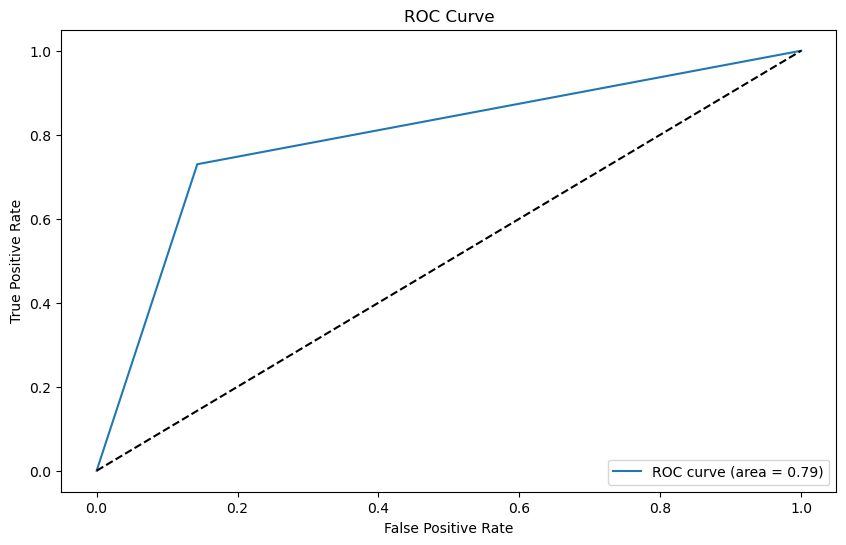

In [31]:
# Visualize the ROC curve
fpr, tpr, _ = roc_curve(y_val, y_pred)
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

In [32]:
# Interpretation
coefficients = pd.DataFrame(model.coef_[0], X.columns, columns=['Coefficient'])
print(coefficients)

          Coefficient
Pclass      -0.774163
Sex         -1.285879
Age         -0.396585
SibSp       -0.327034
Parch       -0.100381
Fare         0.115395
Cabin       -0.031366
Embarked    -0.173252


In [33]:
# Save the model for deployment
with open('logistic_regression_model.pkl', 'wb') as file:
    pickle.dump(model, file)


In [34]:
# Deployment with Streamlit
# streamlit_app.py
import streamlit as st
import pandas as pd
import pickle
from sklearn.preprocessing import StandardScaler


In [35]:
# Load the trained model
with open('logistic_regression_model.pkl', 'rb') as file:
    model = pickle.load(file)


In [36]:
st.title('Titanic Survival Prediction')
st.write('Enter the details to predict the survival:')


2024-07-29 18:35:43.081 
  command:

    streamlit run C:\ProgramData\anaconda3\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]


In [37]:
# User inputs
age = st.number_input('Age', min_value=0, max_value=100, value=25)
sex = st.selectbox('Sex', ['Male', 'Female'])
pclass = st.selectbox('Pclass', [1, 2, 3])
sibsp = st.number_input('SibSp', min_value=0, max_value=10, value=0)
parch = st.number_input('Parch', min_value=0, max_value=10, value=0)
fare = st.number_input('Fare', min_value=0.0, max_value=600.0, value=32.2)
embarked = st.selectbox('Embarked', ['C', 'Q', 'S'])
cabin = st.selectbox('Cabin', ['Unknown', 'C', 'E', 'G', 'D', 'A', 'B', 'F'])


2024-07-29 18:35:56.685 Session state does not function when running a script without `streamlit run`


In [38]:
# Preprocess inputs
le = LabelEncoder()
sex = le.fit_transform([sex])[0]
embarked = le.fit_transform([embarked])[0]
cabin = le.fit_transform([cabin])[0]

In [39]:
# Normalize the inputs
scaler = StandardScaler()
user_input = scaler.fit_transform([[pclass, sex, age, sibsp, parch, fare, cabin, embarked]])

In [40]:
# Predict
if st.button('Predict'):
    prediction = model.predict(user_input)
    if prediction == 1:
        st.write('The passenger would have survived.')
    else:
        st.write('The passenger would not have survived.')
